# Library

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Function

In [2]:
# To create a lobster graph with three parameters
def lobster_graf(p,q,r):
    G = nx.Graph()
    edge1 = zip(range(1,p), range(2,p+1))
    G.add_edges_from(edge1)

    index = p+1
    nodes = [i for i in G]
    for i in nodes:
        for j in range(q):
            G.add_edge(i, index)
            index += 1

    nodes2 = [i for i in G if i not in nodes]
    for i in nodes2:
        for j in range(r):
            G.add_edge(i, index)
            index += 1

    return G

In [3]:
# To calculate the label for edge and vertex on each iteration according to the rules on the proof.
def labelvalue(n, k):
    value = []
    temp = n - k
    if temp == 2:
        value = [2,0]
    else:
        a = temp // 2
        b = temp - a
        if (a % 2 != 0) and (b % 2 != 0):
            value.append(b+1)
            value.append(a-1)
        elif a % 2 == 0:
            value.append(b)
            value.append(a)
        else:
            value.append(a)
            value.append(b)
    return value

In [5]:
# Full functioning code for edge irregular reflexive labeling on lobster graph
def EIRL_lobster(p,q,r):

    def label(H, n1, n2, value):
        H[n1][n2]['w'] = value[0]
        nx.set_node_attributes(H, {n2: value[1]}, 'w')

    H = lobster_graf(p,q,r)
    layer1 = [i for i in range(1,p+1)]
    layer2 = [i for i in range(p+1, p+q*p+1)]
    layer3 = [i for i in range(p+q*p+1, p+q*p+q*p*r+1)]
    index = len(H.edges)

    for node1 in layer1:
        if index == len(H.edges):
            attr = index // 3
            if attr % 2 == 0:
                H.nodes[node1]['w'] = attr
            else:
                H.nodes[node1]['w'] = attr+1
        neigh2 = [i for i in H[node1] if i in layer2]
        for node2 in neigh2:
            if index == r + 1:
                nx.set_node_attributes(H, {node2: 0}, 'w')
                H[node1][node2]['w'] = index - H.nodes[node1]['w']
                index -= 1
            else:
                value = labelvalue(index, H.nodes[node1]['w'])
                label(H, node1, node2, value)
                index -= 1

            neigh3 = [i for i in H[node2] if i in layer3]
            for node3 in neigh3:
                value = labelvalue(index, H.nodes[node2]['w'])
                label(H, node2, node3, value)
                index -= 1
                
        if node1 == len(layer1) - 1:
            temp = (len(H.edges) - p + 1) // (p*q)
            remain = index - H.nodes[node1]['w'] - temp
            if remain < 0 :
                nx.set_node_attributes(H, {node1+1: temp + remain}, 'w')
                H[node1][node1+1]['w'] = 0
                index -=1
            else:
                nx.set_node_attributes(H, {node1+1: temp}, 'w')
                H[node1][node1+1]['w'] = index - H.nodes[node1]['w'] - temp
                index -=1
        elif node1 < len(layer1):
            value = labelvalue(index, H.nodes[node1]['w'])
            label(H, node1, node1 + 1, value)
            index -= 1
    return H

# Example

Create any lobster graph by changing the value of parameters $p,q,r$.

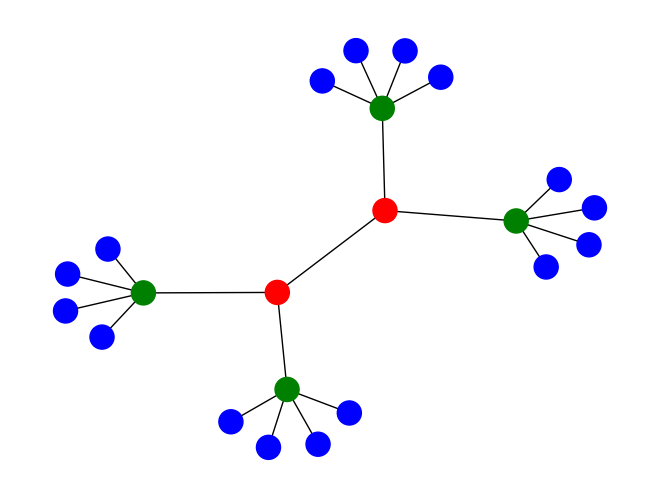

In [10]:
p = 2; q = 2; r = 4
H = lobster_graf(p,q,r)
node_color = []
for i in H.nodes:
    if i <= p : node_color.append('red')
    elif i <= p + p*q : node_color.append('green')
    else : node_color.append('blue')
nx.draw(H, pos = nx.spring_layout(H, seed=1), with_labels=False, node_color = node_color)

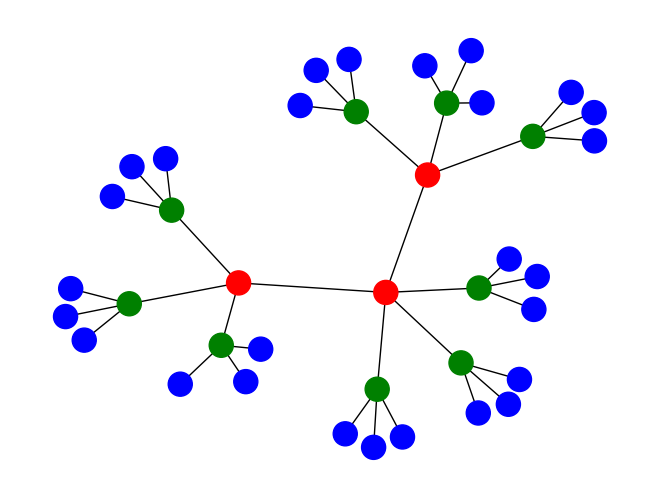

In [9]:
p = 3; q = 3; r = 3
H = lobster_graf(p,q,r)
node_color = []
for i in H.nodes:
    if i <= p : node_color.append('red')
    elif i <= p + p*q : node_color.append('green')
    else : node_color.append('blue')
nx.draw(H, pos = nx.spring_layout(H, seed=6), with_labels=False, node_color = node_color)

Immediately label the lobster graph to complies with edge irregular reflexive labeling.

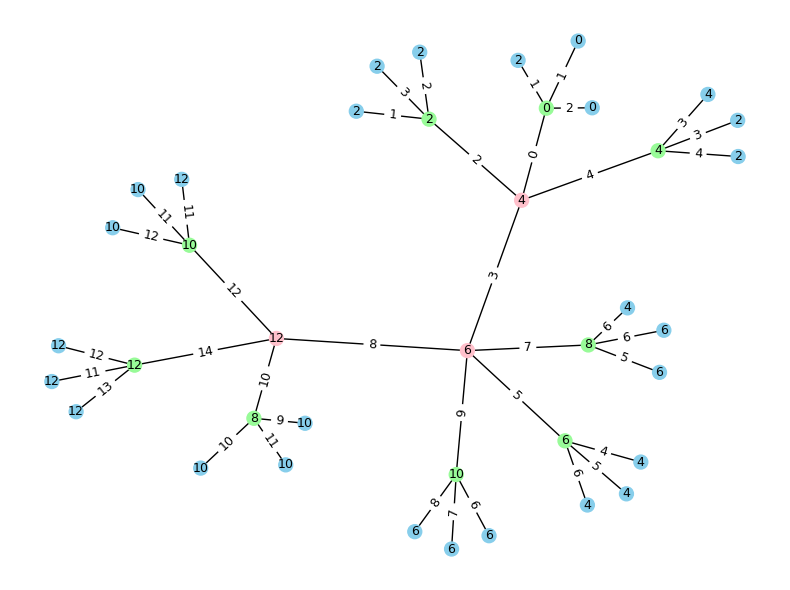

In [12]:
p = 3; q = 3; r = 3 # parameters
H = EIRL_lobster(p,q,r)

pos = nx.spring_layout(H, seed = 6)  # positions for all nodes - seed for reproducibility

plt.figure(figsize=(8,6))
edgelist = [(u,v) for (u,v,d) in H.edges(data=True)]

node_color = []

for i in H.nodes:
    if i <= p : 
        node_color.append('pink')
    elif i <= p + p*q : 
        node_color.append('palegreen')
    else : 
        node_color.append('skyblue')

# nodes
nx.draw_networkx_nodes(H, pos, node_size=100, node_color=node_color)

# edges
nx.draw_networkx_edges(
    H, pos, edgelist, edge_color="black", style='solid'
)

# node labels
node_labels = nx.get_node_attributes(H, 'w')
nx.draw_networkx_labels(H, pos, node_labels, font_size=9, font_family="sans-serif")

# edge w labels
edge_labels = nx.get_edge_attributes(H, "w")
nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=9)

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

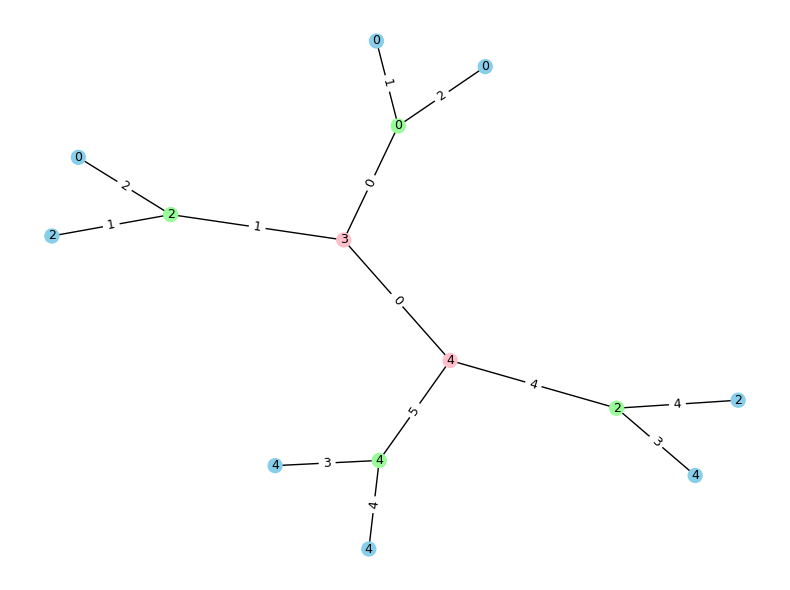

In [13]:
p = 2; q = 2; r = 2 # parameters
H = EIRL_lobster(p,q,r)

pos = nx.spring_layout(H, seed = 6)  # positions for all nodes - seed for reproducibility

plt.figure(figsize=(8,6))
edgelist = [(u,v) for (u,v,d) in H.edges(data=True)]

node_color = []

for i in H.nodes:
    if i <= p : 
        node_color.append('pink')
    elif i <= p + p*q : 
        node_color.append('palegreen')
    else : 
        node_color.append('skyblue')

# nodes
nx.draw_networkx_nodes(H, pos, node_size=100, node_color=node_color)

# edges
nx.draw_networkx_edges(
    H, pos, edgelist, edge_color="black", style='solid'
)

# node labels
node_labels = nx.get_node_attributes(H, 'w')
nx.draw_networkx_labels(H, pos, node_labels, font_size=9, font_family="sans-serif")

# edge w labels
edge_labels = nx.get_edge_attributes(H, "w")
nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=9)

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

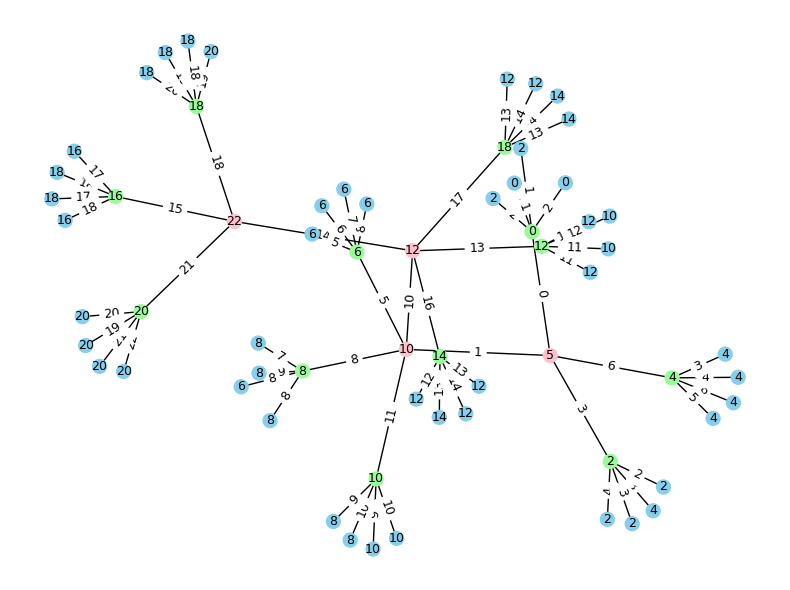

In [17]:
p = 4; q = 3; r = 4 # parameters
H = EIRL_lobster(p,q,r)

pos = nx.spring_layout(H, seed = 10)  # positions for all nodes - seed for reproducibility

plt.figure(figsize=(8,6))
edgelist = [(u,v) for (u,v,d) in H.edges(data=True)]

node_color = []

for i in H.nodes:
    if i <= p : 
        node_color.append('pink')
    elif i <= p + p*q : 
        node_color.append('palegreen')
    else : 
        node_color.append('skyblue')

# nodes
nx.draw_networkx_nodes(H, pos, node_size=100, node_color=node_color)

# edges
nx.draw_networkx_edges(
    H, pos, edgelist, edge_color="black", style='solid'
)

# node labels
node_labels = nx.get_node_attributes(H, 'w')
nx.draw_networkx_labels(H, pos, node_labels, font_size=9, font_family="sans-serif")

# edge w labels
edge_labels = nx.get_edge_attributes(H, "w")
nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=9)

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()